In [1]:

import matplotlib.pyplot as plt
import numpy as np
list_x = np.loadtxt('dane_lista1.txt', dtype = float)
list_y = np.exp(list_x)

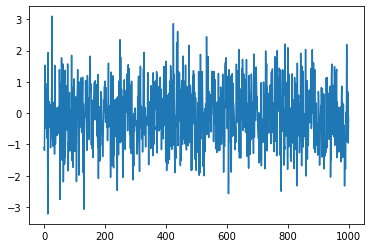

In [2]:
plt.plot(list_x)

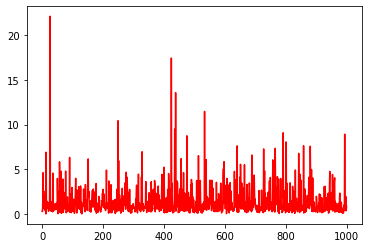

In [3]:
plt.plot(list_y, c='r')

(array([ 1.,  1.,  0.,  1.,  0.,  3.,  0.,  2.,  4.,  7.,  8., 12., 12.,
        14., 23., 22., 29., 39., 38., 46., 36., 46., 46., 59., 50., 50.,
        57., 45., 45., 39., 38., 31., 33., 41., 17., 29., 21., 16.,  7.,
        10.,  6.,  6.,  4.,  1.,  2.,  0.,  1.,  0.,  1.,  1.]),
 array([-3.2169378 , -3.0906902 , -2.9644426 , -2.83819501, -2.71194741,
        -2.58569981, -2.45945221, -2.33320461, -2.20695702, -2.08070942,
        -1.95446182, -1.82821422, -1.70196662, -1.57571903, -1.44947143,
        -1.32322383, -1.19697623, -1.07072863, -0.94448104, -0.81823344,
        -0.69198584, -0.56573824, -0.43949064, -0.31324305, -0.18699545,
        -0.06074785,  0.06549975,  0.19174735,  0.31799494,  0.44424254,
         0.57049014,  0.69673774,  0.82298534,  0.94923293,  1.07548053,
         1.20172813,  1.32797573,  1.45422333,  1.58047092,  1.70671852,
         1.83296612,  1.95921372,  2.08546132,  2.21170891,  2.33795651,
         2.46420411,  2.59045171,  2.71669931,  2.8429469 ,

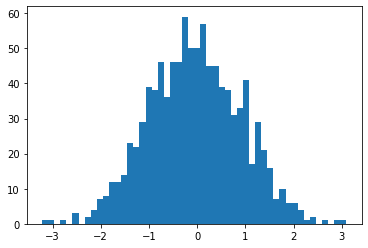

In [4]:
plt.hist(list_x,50)

(array([0.56671537, 0.54404675, 0.35816411, 0.21081812, 0.13374483,
        0.12467738, 0.06347212, 0.06120526, 0.0589384 , 0.0294692 ,
        0.02720234, 0.01586803, 0.00680058, 0.01586803, 0.00680058,
        0.00680058, 0.00453372, 0.00906745, 0.00226686, 0.00226686,
        0.00453372, 0.00226686, 0.        , 0.00226686, 0.        ,
        0.00226686, 0.        , 0.        , 0.        , 0.        ,
        0.00226686, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00226686,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00226686]),
 array([ 0.0400776 ,  0.48121615,  0.92235471,  1.36349327,  1.80463183,
         2.24577038,  2.68690894,  3.1280475 ,  3.56918606,  4.01032461,
         4.45146317,  4.89260173,  5.33374028,  5.77487884,  6.2160174 ,
         6.65715596,  7.09829451,  7.53943307,  7.98057163,  8.42171019,
         8.86284874,  9.30

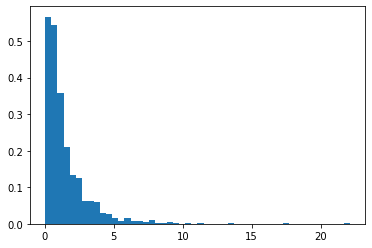

In [5]:
plt.hist(list_y,50, density=True)

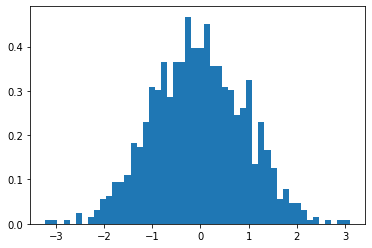

In [6]:
(n, bins, patches) = plt.hist(list_x,50, density=True)


In [7]:
#lambda 5, alfa 5
U = np.random.random(1000)
U = 5*(U**(-1/5)-1)

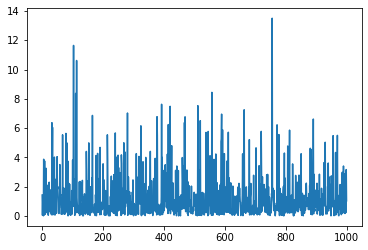

In [8]:
plt.plot(U)

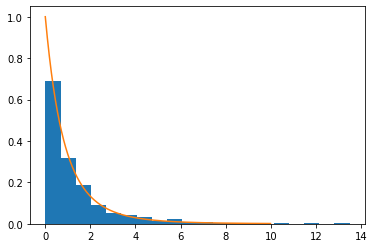

In [9]:
def dens_teo(lam,alph,xsize):
    x = np.arange(0,xsize,0.01)
    y = (alph*lam**alph)/((lam+x)**(alph+1))
    return y

plt.hist(U,20,density=True)
plt.plot(np.arange(0,10,0.01),dens_teo(5,5,10))
#plt.hist()

In [16]:
def dist_teo_pareto(lam,alph,xsize):
    x = np.arange(0,xsize,0.01)
    y = 1 - (lam/(lam+x))**alph
    return y

cdfx = np.sort(U)
x_val = np.linspace(start=min(cdfx),stop=max(cdfx),num=len(cdfx))
size = U.size
y_val = []
for i in x_val:
    temp = U[U <= i]
    value = temp.size / size
    y_val.append(value)

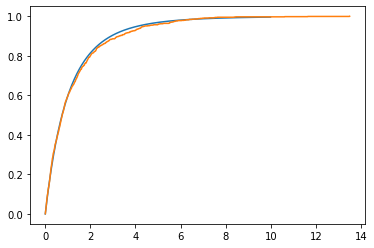

In [17]:
plt.plot(np.arange(0,10,0.01),np.array(dist_teo_pareto(5,5,10)),label = "dystrybuanta teoretyczna")
plt.plot(x_val,np.array(y_val), label = "dystrybuanta empiryczna")
plt.legend()

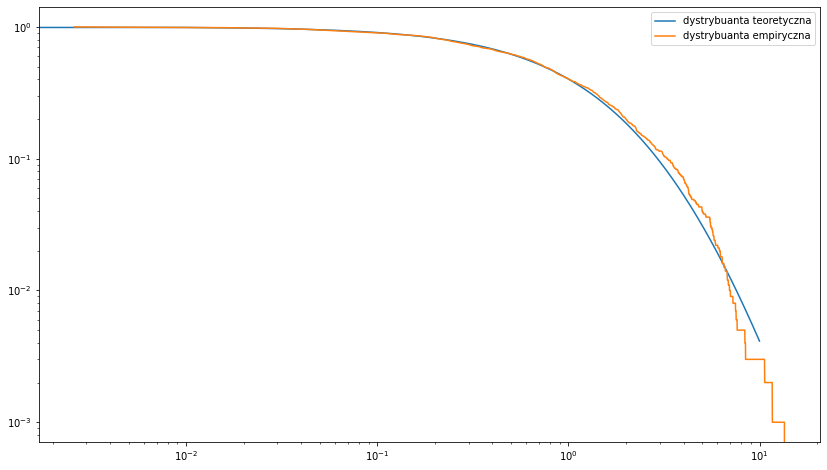

In [11]:
plt.figure(figsize=(14,8))
plt.plot(np.arange(0,10,0.01),1-np.array(dist_teo_pareto(5,5,10)),label = "dystrybuanta teoretyczna")
plt.plot(x_val,1-np.array(y_val), label = "dystrybuanta empiryczna")
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [12]:
#zadanie ostatnie
W = U**(1/5)

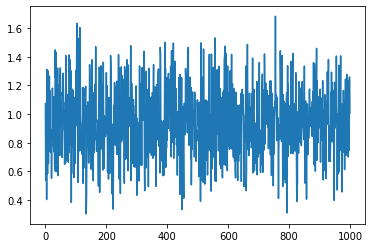

In [13]:
plt.plot(W)

Text(0.5, 1.0, 'Gęstość teoretyczna X')

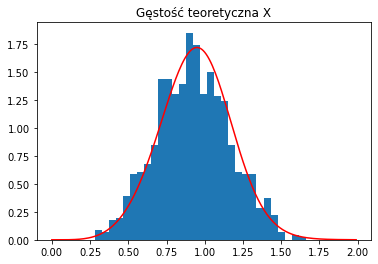

In [38]:
def dens_teo_burr(lam,alph,r,xsize):
    x = np.arange(0,xsize,0.01)
    y = alph*r*x**(r-1)*((lam/(x**r+lam))**alph)/(x**r+lam)
    return y

n,edges=np.histogram(W,bins=30)
plt.bar(edges[:-1], (n/len(list_x))/(edges[1]-edges[0]), width=(edges[1]-edges[0]))
plt.plot(np.arange(0,2,0.01),dens_teo_burr(5,5,5,2), color = 'red')
plt.title("Porównanie gęstości teoretycznej z gęstością empiryczną")

In [19]:
def dist_teo_burr(lam,alph,r,xsize):
    x = np.arange(0,xsize,0.01)
    y = 1 - (lam/(lam+x**r))**alph
    return y


cdfx = np.sort(W)
x_val2 = np.linspace(start=min(cdfx),stop=max(cdfx),num=len(cdfx))
size = W.size
y_val2 = []
for i in x_val:
    temp = W[W <= i]
    value = temp.size / size
    y_val2.append(value)

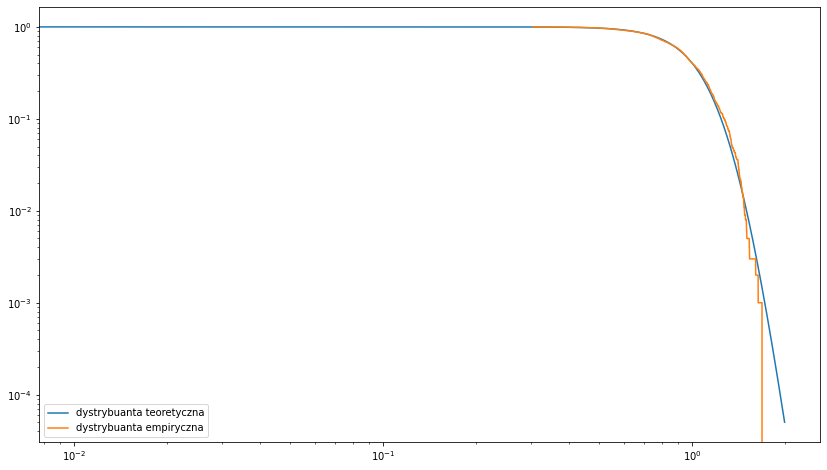

In [24]:
plt.figure(figsize=(14,8))
plt.plot(np.arange(0,2,0.01),1-np.array(dist_teo_burr(5,5,5,2)),label = "ogony dystrybuanty teoretycznej")
plt.plot(x_val2,1-np.array(y_val2), label = "ogony dystrybuanty empirycznej")
plt.xscale('log')
plt.yscale('log')
plt.legend()

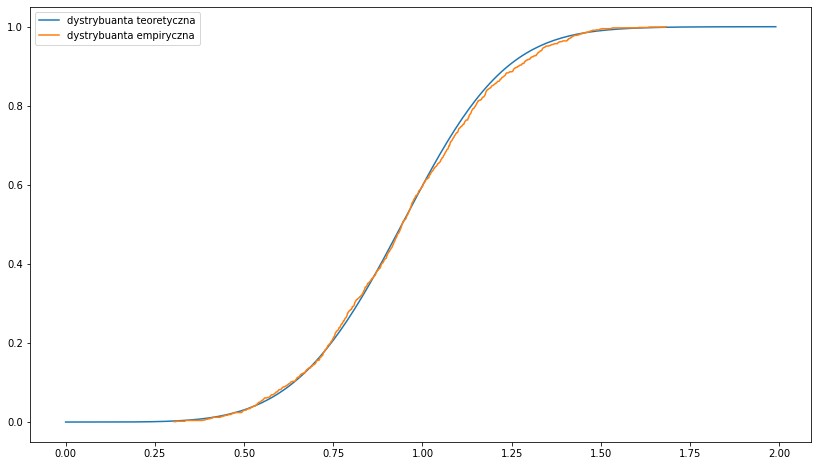

In [23]:
plt.figure(figsize=(14,8))
plt.plot(np.arange(0,2,0.01),np.array(dist_teo_burr(5,5,5,2)),label = "dystrybuanta teoretyczna")
plt.plot(x_val2,np.array(y_val2), label = "dystrybuanta empiryczna")
plt.legend()